# Principal Component Analysis (PCA)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
!wget https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Dimension%20Reduction/Wine.csv

--2021-10-27 15:56:52--  https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Dimension%20Reduction/Wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11284 (11K) [text/plain]
Saving to: ‘Wine.csv’

Wine.csv            100%[===================>]  11.02K  --.-KB/s    in 0s      

2021-10-27 15:56:52 (83.2 MB/s) - ‘Wine.csv’ saved [11284/11284]



In [22]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train[0], len(X_train[0])

(array([ 0.87668336,  0.79842885,  0.64412971,  0.12974277,  0.48853231,
        -0.70326216, -1.42846826,  1.0724566 , -1.36820277,  0.35193216,
         0.0290166 , -1.06412236, -0.2059076 ]), 13)

## Applying PCA

In this example, we only keep 2 components for easy of plotting data

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # number of components want to keep
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [27]:
X_train[0] # from 13 dimension features reduce to only 2 dimensions

array([-2.17884511, -1.07218467])

## Training the Logistic Regression model on the Training set

In [28]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Making the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

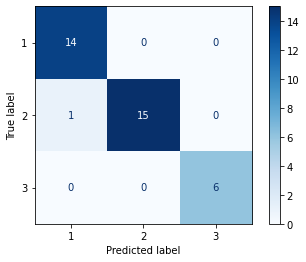

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


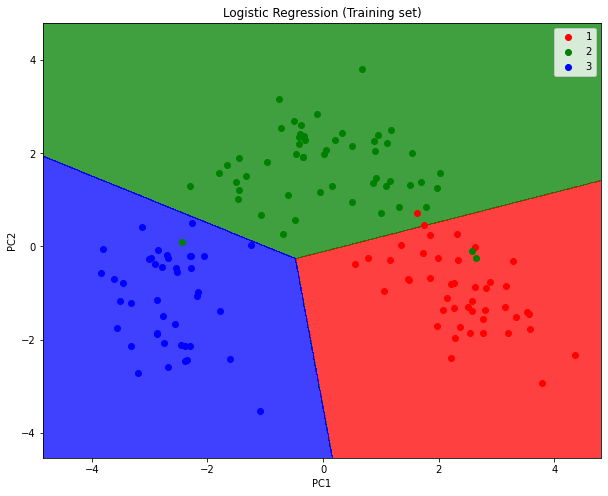

In [60]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1_min, X1_max = X_set[:, 0].min()-1, X_set[:, 1].max()+1
X2_min, X2_max = X_set[:, 1].min()-1, X_set[:, 1].max()+1

X1, X2 = np.meshgrid(np.arange(start=X1_min, stop=X1_max, step=0.01),
                     np.arange(start=X2_min, stop=X2_max, step=0.01))

# predict these values
X_in = np.array([X1.ravel(), X2.ravel()]).T
y_pred = classifier.predict(X_in).reshape(X1.shape)

# plot the contourf
plt.figure(figsize=(10,8))
plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
# plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set,alpha=1, cmap=plt.cm.RdYlGn)
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


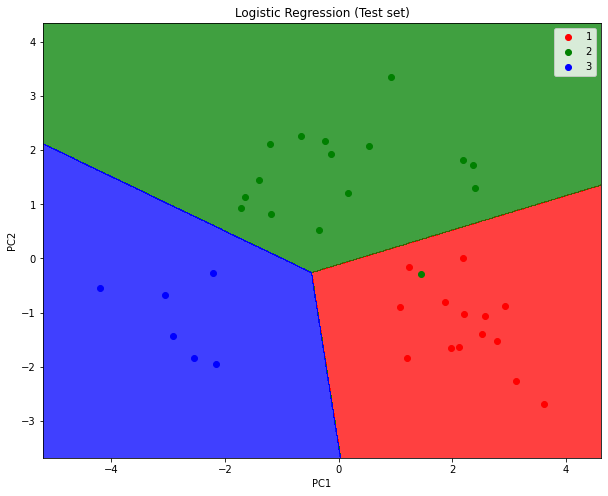

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


plt.figure(figsize=(10,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()